## Problem Statement

You are given a rich dataset consisting of thousands of rows of past records, which you can use to learn more about your customers’ behaviours. For example, you are supposed to create an ML model to look at a case of an insurance claim and decide whether to reject or accept it. 


Columns: ['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE']

 Learn and predict the OUTCOME variable.

In [1]:
## Importing Necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
# Read files
train = pd.read_csv(r"C:\Users\HP\Downloads\train (1).csv")
test = pd.read_csv(r"C:\Users\HP\Downloads\test (1).csv")
submission = pd.read_csv(r"C:\Users\HP\Downloads\submission.csv")

In [3]:
# preview the Dataset
train.head(3)
test.head(3)
submission.head(3)

,ID,OUTCOME
0,303713,0
1,141107,0
2,447316,0


In [4]:
# Combined dataset
data = pd.concat([train,test],ignore_index=True)

In [5]:
data.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379,11000,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238,9000,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1,before 2015,1,1,10238,12000,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1,before 2015,0,1,92099,6000,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1,after 2015,1,1,32122,15000,0,0,1,0.0,Sedan


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  int64  
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  int64  
 10  CHILDREN             105000 non-null  int64  
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  int64  
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [7]:
data.head(2)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379,11000,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238,9000,0,0,0,1.0,HatchBack


In [8]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

In [9]:
## Extracting Categorical columns from the Dataset
cat = data.select_dtypes(include='object').columns

In [10]:
## Extracting numerical columns from the dataset
num = data.select_dtypes(include=np.number).columns

In [11]:
cat_cols = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME','VEHICLE_YEAR',
            'TYPE_OF_VEHICLE','VEHICLE_OWNERSHIP','MARRIED','CHILDREN','OUTCOME']

In [12]:
num_cols = ['CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS','PAST_ACCIDENTS']

## Univariate Analysis

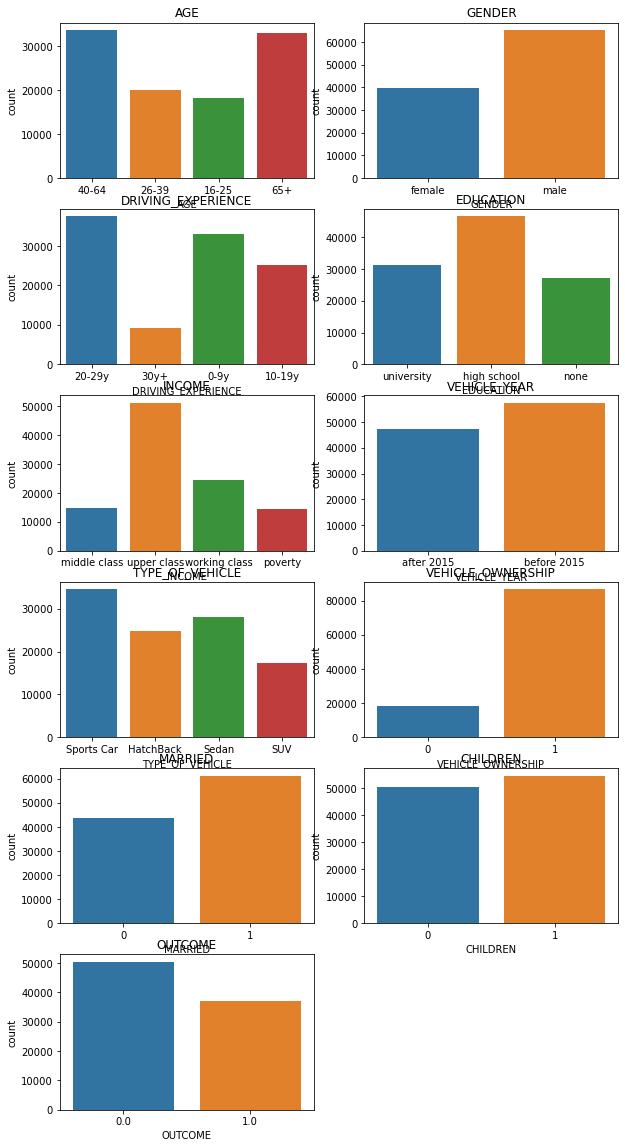

<Figure size 432x288 with 0 Axes>

In [14]:
## Categorical columns

plt.figure(figsize=(10,20))
cat_cols = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME','VEHICLE_YEAR',
            'TYPE_OF_VEHICLE','VEHICLE_OWNERSHIP','MARRIED','CHILDREN','OUTCOME']
t=1
for i in cat_cols:
    plt.subplot(6,2,t)
    sns.countplot(data.loc[:,i])
    plt.title(i)
    t=t+1
plt.show()
plt.tight_layout()


## INFERENCES::::::::::
# 40-64
# male
# 20-29y
# High School
# Upper Class
# before 2015
# Sports Car



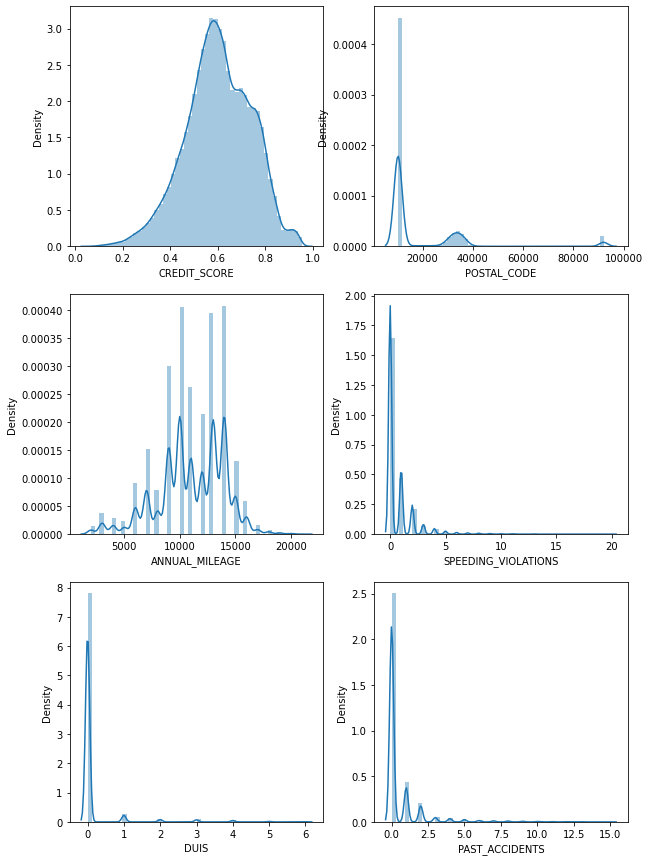

<Figure size 432x288 with 0 Axes>

In [15]:
## Numerical columns

plt.figure(figsize=(10,15))
num = ['CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS']

t=1
for i in num:
    plt.subplot(3,2,t)
    sns.distplot(data.loc[:,i])
    t=t+1
plt.show()
plt.tight_layout()



## Bivariate Analysis

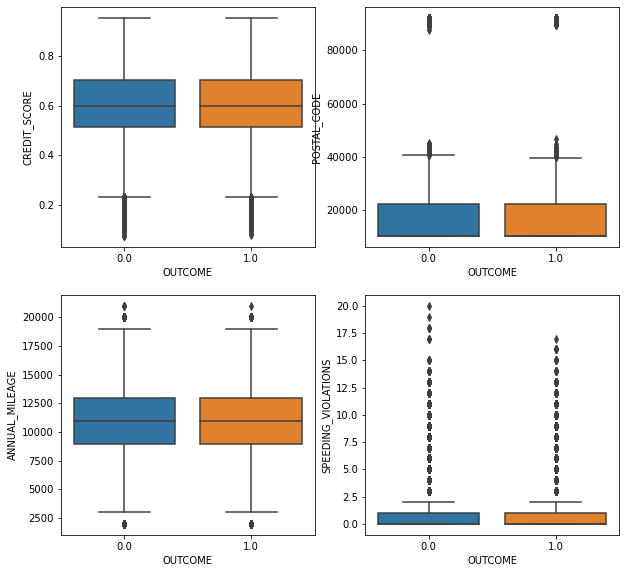

<Figure size 432x288 with 0 Axes>

In [31]:
# Num vs Num

plt.figure(figsize=(10,15))
num = ['CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS']

t=1
for i in num:
    plt.subplot(3,2,t)
    sns.boxplot(data.OUTCOME,data.loc[:,i])
    t=t+1
plt.show()
plt.tight_layout()

## INFERENCES

# 

<Figure size 720x360 with 0 Axes>

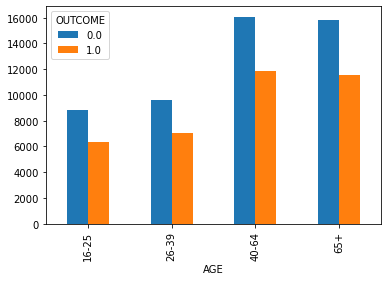

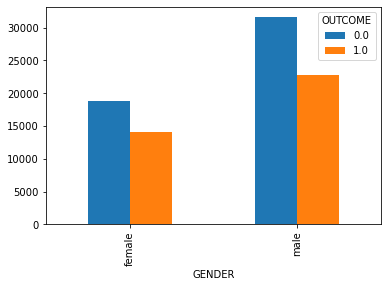

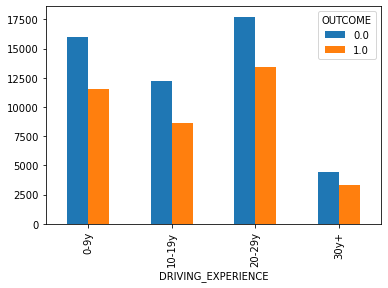

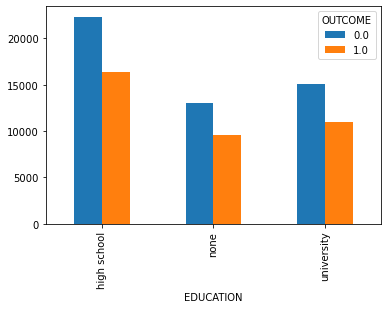

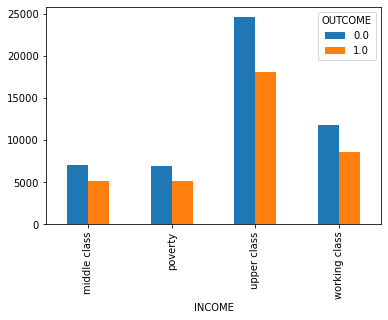

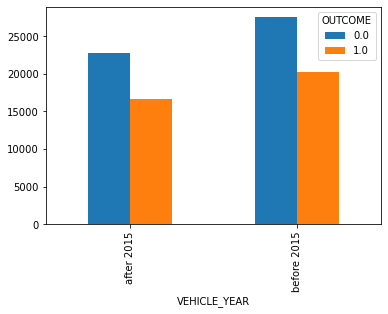

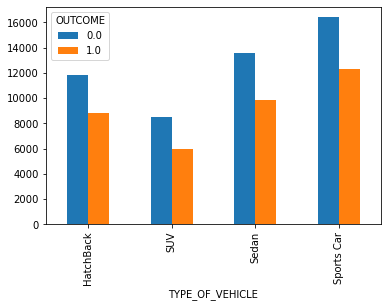

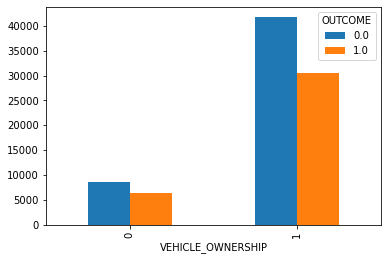

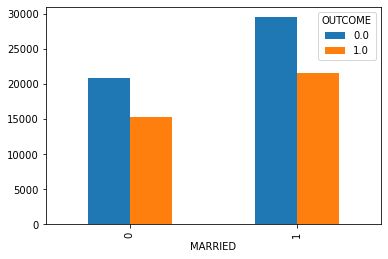

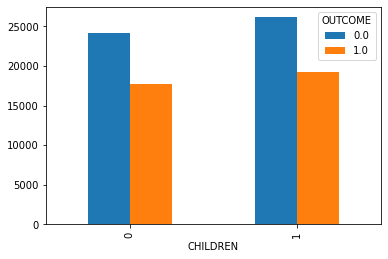

In [30]:
## Cat vs Cat

plt.figure(figsize=(10,5))

for i in cat_cols:
    pd.crosstab(data[i],data['OUTCOME']).plot(kind='bar')
plt.show()

## Missing Value

In [38]:
data.isnull().sum()

ID                         0
AGE                        0
GENDER                     0
DRIVING_EXPERIENCE         0
EDUCATION                  0
INCOME                     0
CREDIT_SCORE               0
VEHICLE_OWNERSHIP          0
VEHICLE_YEAR               0
MARRIED                    0
CHILDREN                   0
POSTAL_CODE                0
ANNUAL_MILEAGE             0
SPEEDING_VIOLATIONS        0
DUIS                       0
PAST_ACCIDENTS             0
OUTCOME                17715
TYPE_OF_VEHICLE            0
dtype: int64

## Outliers

In [39]:
data.skew()

ID                     0.448392
CREDIT_SCORE          -0.226358
VEHICLE_OWNERSHIP     -1.729404
MARRIED               -0.341446
CHILDREN              -0.080065
POSTAL_CODE            2.986882
ANNUAL_MILEAGE        -0.510118
SPEEDING_VIOLATIONS    3.899817
DUIS                   5.608688
PAST_ACCIDENTS         4.345520
OUTCOME                0.311893
dtype: float64

In [40]:
for i in num:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    ul = q3+1.5*iqr
    ll = q1-1.5*iqr
    data.loc[data[i]>ul,i] =ul
    data.loc[data[i]<ll,i] =ll

In [41]:
data.skew()

ID                     0.448392
CREDIT_SCORE          -0.178050
VEHICLE_OWNERSHIP     -1.729404
MARRIED               -0.341446
CHILDREN              -0.080065
POSTAL_CODE            1.257846
ANNUAL_MILEAGE        -0.485957
SPEEDING_VIOLATIONS    1.295590
DUIS                   5.608688
PAST_ACCIDENTS         4.345520
OUTCOME                0.311893
dtype: float64

## Feature Engineering

In [42]:
d = data.copy()

In [43]:
d.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379.000,11000,0.0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238.000,9000,0.0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1,before 2015,1,1,10238.000,12000,0.0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1,before 2015,0,1,42037.375,6000,1.0,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1,after 2015,1,1,32122.000,15000,0.0,0,1,0.0,Sedan


In [44]:
d['magic3'] = d.groupby('GENDER')['ID'].transform('nunique')

In [45]:
zero = d.loc[d.OUTCOME==0,'magic3']
one = d.loc[d.OUTCOME==1,'magic3']
stats.ttest_ind(zero,one)

Ttest_indResult(statistic=3.1824686692653907, pvalue=0.0014607646877491602)

In [47]:
# d = d.drop(columns=['magic1','magic2'])

In [ ]:
d.head()

In [48]:
n = d.select_dtypes(include=np.number).columns

In [49]:
newtrain = d.loc[0:train.shape[0]-1,]
newtest = d.loc[train.shape[0]:,]

In [50]:
train.shape,test.shape,newtrain.shape,newtest.shape


((87285, 18), (17715, 17), (87285, 19), (17715, 19))

In [51]:
X = newtrain.drop('OUTCOME',axis=1)
newtest = newtest.drop('OUTCOME',axis=1)
y = newtrain.OUTCOME

In [52]:
X.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE,magic3
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379.000,11000,0.0,0,0,Sports Car,38681
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238.000,9000,0.0,0,0,HatchBack,62678
2,481952,40-64,male,20-29y,none,middle class,0.839817,1,before 2015,1,1,10238.000,12000,0.0,0,0,Sedan,62678
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1,before 2015,0,1,42037.375,6000,1.0,0,0,Sedan,62678
4,498013,40-64,female,20-29y,none,working class,0.572184,1,after 2015,1,1,32122.000,15000,0.0,0,1,Sedan,38681


In [53]:
y.head(2)

0    0.0
1    1.0
Name: OUTCOME, dtype: float64

In [54]:
newtest.head(2)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE,magic3
87285,303713,16-25,male,10-19y,high school,middle class,0.424958,1,before 2015,1,0,10238.0,13000,0.0,0,0,Sports Car,62678
87286,141107,16-25,male,20-29y,high school,working class,0.503478,0,before 2015,1,1,10238.0,14000,0.0,0,0,SUV,62678


In [55]:
scale = ['CREDIT_SCORE','POSTAL_CODE','ANNUAL_MILEAGE','magic3']

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
for i in scale:
    X.loc[:,i] = sc.fit_transform(pd.DataFrame(X.loc[:,i]))
    newtest.loc[:,i] = sc.fit_transform(pd.DataFrame(newtest.loc[:,i]))

In [56]:
X.head(2)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE,magic3
0,816393,40-64,female,20-29y,university,middle class,0.260535,0,after 2015,0,0,1.969889,-0.020594,0.0,0,0,Sports Car,-1.285518
1,251762,26-39,male,20-29y,high school,middle class,-0.924269,1,before 2015,1,0,-0.575035,-0.696478,0.0,0,0,HatchBack,0.777897


In [57]:
newtest.head(2)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE,magic3
87285,303713,16-25,male,10-19y,high school,middle class,-1.292141,1,before 2015,1,0,-0.580906,0.651566,0.0,0,0,Sports Car,0.787136
87286,141107,16-25,male,20-29y,high school,working class,-0.722523,0,before 2015,1,1,-0.580906,0.992494,0.0,0,0,SUV,0.787136


In [58]:
X.AGE.unique()

array(['40-64', '26-39', '16-25', '65+'], dtype=object)

In [59]:
dic = {'40-64':3, '26-39':1, '16-25':0, '65+':2}

In [60]:
X.AGE = X.AGE.map(dic)
newtest.AGE = newtest.AGE.map(dic)

In [61]:
X.GENDER.unique()

array(['female', 'male'], dtype=object)

In [62]:
X.DRIVING_EXPERIENCE.unique()

array(['20-29y', '30y+', '0-9y', '10-19y'], dtype=object)

In [63]:
dic1 ={'20-29y':3, '30y+':0, '0-9y':2, '10-19y':1}

In [64]:
X.DRIVING_EXPERIENCE = X.DRIVING_EXPERIENCE.map(dic1)
newtest.DRIVING_EXPERIENCE = newtest.DRIVING_EXPERIENCE.map(dic1)

In [65]:
X.head(2)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE,magic3
0,816393,3,female,3,university,middle class,0.260535,0,after 2015,0,0,1.969889,-0.020594,0.0,0,0,Sports Car,-1.285518
1,251762,1,male,3,high school,middle class,-0.924269,1,before 2015,1,0,-0.575035,-0.696478,0.0,0,0,HatchBack,0.777897


In [66]:
X.EDUCATION.unique()

array(['university', 'high school', 'none'], dtype=object)

In [67]:
dic2 = {'university':1, 'high school':2, 'none':0}

In [68]:
X.EDUCATION = X.EDUCATION.map(dic2)
newtest.EDUCATION= newtest.EDUCATION.map(dic2)

In [69]:
X.head(2)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE,magic3
0,816393,3,female,3,1,middle class,0.260535,0,after 2015,0,0,1.969889,-0.020594,0.0,0,0,Sports Car,-1.285518
1,251762,1,male,3,2,middle class,-0.924269,1,before 2015,1,0,-0.575035,-0.696478,0.0,0,0,HatchBack,0.777897


In [70]:
X.INCOME.unique()

array(['middle class', 'upper class', 'working class', 'poverty'],
      dtype=object)

In [71]:
X.INCOME.replace(to_replace=['middle class', 'upper class', 'working class', 'poverty'],
                 value=['middle class', 'upper class', 'middle class', 'lower class'],inplace=True)
newtest.INCOME.replace(to_replace=['middle class', 'upper class', 'working class', 'poverty'],
                 value=['middle class', 'upper class', 'middle class', 'lower class'],inplace=True)


In [72]:
X.head(2)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE,magic3
0,816393,3,female,3,1,middle class,0.260535,0,after 2015,0,0,1.969889,-0.020594,0.0,0,0,Sports Car,-1.285518
1,251762,1,male,3,2,middle class,-0.924269,1,before 2015,1,0,-0.575035,-0.696478,0.0,0,0,HatchBack,0.777897


In [73]:
X.INCOME.unique()

array(['middle class', 'upper class', 'lower class'], dtype=object)

In [74]:
X.INCOME = X.INCOME.map(dic3)
newtest.INCOME= newtest.INCOME.map(dic3)

NameError: name 'dic3' is not defined

In [75]:
X.head(2)

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE,magic3
0,816393,3,female,3,1,middle class,0.260535,0,after 2015,0,0,1.969889,-0.020594,0.0,0,0,Sports Car,-1.285518
1,251762,1,male,3,2,middle class,-0.924269,1,before 2015,1,0,-0.575035,-0.696478,0.0,0,0,HatchBack,0.777897


In [76]:
X = pd.get_dummies(X,drop_first=True)
newtest = pd.get_dummies(newtest,drop_first=True)


In [77]:
X.head(2)

,ID,AGE,DRIVING_EXPERIENCE,EDUCATION,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,magic3,GENDER_male,INCOME_middle class,INCOME_upper class,VEHICLE_YEAR_before 2015,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
0,816393,3,3,1,0.260535,0,0,0,1.969889,-0.020594,0.0,0,0,-1.285518,0,1,0,0,0,0,1
1,251762,1,3,2,-0.924269,1,1,0,-0.575035,-0.696478,0.0,0,0,0.777897,1,1,0,1,0,0,0


In [78]:
newtest.head(2)

,ID,AGE,DRIVING_EXPERIENCE,EDUCATION,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,magic3,GENDER_male,INCOME_middle class,INCOME_upper class,VEHICLE_YEAR_before 2015,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
87285,303713,0,1,2,-1.292141,1,1,0,-0.580906,0.651566,0.0,0,0,0.787136,1,1,0,1,0,0,1
87286,141107,0,3,2,-0.722523,0,1,1,-0.580906,0.992494,0.0,0,0,0.787136,1,1,0,1,1,0,0


In [79]:
X.drop(columns=['ID'],inplace=True)

In [80]:
newtest.drop(columns=['ID'],inplace=True)

In [81]:
X.head(2)

,AGE,DRIVING_EXPERIENCE,EDUCATION,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,magic3,GENDER_male,INCOME_middle class,INCOME_upper class,VEHICLE_YEAR_before 2015,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
0,3,3,1,0.260535,0,0,0,1.969889,-0.020594,0.0,0,0,-1.285518,0,1,0,0,0,0,1
1,1,3,2,-0.924269,1,1,0,-0.575035,-0.696478,0.0,0,0,0.777897,1,1,0,1,0,0,0


In [82]:
newtest.head(2)

,AGE,DRIVING_EXPERIENCE,EDUCATION,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,magic3,GENDER_male,INCOME_middle class,INCOME_upper class,VEHICLE_YEAR_before 2015,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
87285,0,1,2,-1.292141,1,1,0,-0.580906,0.651566,0.0,0,0,0.787136,1,1,0,1,0,0,1
87286,0,3,2,-0.722523,0,1,1,-0.580906,0.992494,0.0,0,0,0.787136,1,1,0,1,1,0,0


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy',max_depth=4)
model_rf = rf.fit(X,y)
y_pred_rf = model_rf.predict(newtest)

In [84]:
submission['OUTCOME']  = y_pred_rf
submission.to_csv('hh.csv',index=False)

In [85]:
#mycols = ['AGE','GENDER','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_YEAR','TYPE_OF_VEHICLE']


#import category_encoders as ce

#tgt =  ce.TargetEncoder(cols=mycols)



#newx = tgt.fit_transform(X,y)


#test_encoded = tgt.transform(newtest)

In [86]:
#newx.head()

test_encoded.head()

newx.head()

test_encoded.head()

newx.drop(columns=['ID'],inplace=True)

test_encoded.drop(columns=['ID'],inplace=True)

newx.head()

test_encoded.head()

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy')
model_rf = rf.fit(newx,y)

y_pred_rf = model_rf.predict(test_encoded)

submission['OUTCOME']  = y_pred_rf

submission.to_csv('hmodel.csv',index=False)

cd

In [87]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [88]:
smotex,smotey = smote.fit_resample(X,y)

In [89]:
rf = RandomForestClassifier(criterion='entropy')
model_rf = rf.fit(smotex,smotey)

In [90]:
y_pred_rf_s = model_rf.predict(newtest)

In [91]:
submission['OUTCOME']  = y_pred_rf_s

In [92]:
submission.to_csv('Hk.csv',index=False)

In [93]:
!pip install lightgbm

In [94]:
!pip install catboost

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [96]:
def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models['rf'] = RandomForestClassifier()
    models['ada'] = AdaBoostClassifier()
    models['gbm'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['naivebayes'] = GaussianNB()
    models['lgbm'] = LGBMClassifier()
    models['catboost'] = CatBoostClassifier()
    return models

In [97]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

def eval_score(model):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score = cross_val_score(model,smotex,smotey,scoring='f1',cv=cv,error_score='raise',n_jobs=-1)
    return score

In [99]:
models = base_models()


result,names = list(),list()
for name, model in models.items():
    finalscore = eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'% (name,np.mean(result),np.std(result)))

lg 0.514 (0.005)
rf 0.557 (0.043)
ada 0.526 (0.058)
gbm 0.486 (0.086)
xgb 0.479 (0.078)
naivebayes 0.496 (0.081)
lgbm 0.482 (0.083)
catboost 0.475 (0.080)


In [100]:
from sklearn.ensemble import StackingClassifier

In [101]:
base = [('xgb',XGBClassifier()),('lgbm',LGBMClassifier())]

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
stack = StackingClassifier(estimators=base,final_estimator=CatBoostClassifier(),cv=cv)


In [102]:
pred_stack = stack.fit(smotex,smotey).predict(newtest)

Learning rate set to 0.07384
0:	learn: 0.6699636	total: 168ms	remaining: 2m 47s
1:	learn: 0.6562258	total: 185ms	remaining: 1m 32s
2:	learn: 0.6469279	total: 202ms	remaining: 1m 7s
3:	learn: 0.6421260	total: 219ms	remaining: 54.4s
4:	learn: 0.6367748	total: 235ms	remaining: 46.8s
5:	learn: 0.6309562	total: 253ms	remaining: 41.9s
6:	learn: 0.6280163	total: 271ms	remaining: 38.4s
7:	learn: 0.6249456	total: 291ms	remaining: 36.1s
8:	learn: 0.6242847	total: 308ms	remaining: 33.9s
9:	learn: 0.6232040	total: 337ms	remaining: 33.4s
10:	learn: 0.6227079	total: 357ms	remaining: 32.1s
11:	learn: 0.6223658	total: 377ms	remaining: 31s
12:	learn: 0.6220645	total: 394ms	remaining: 29.9s
13:	learn: 0.6211308	total: 409ms	remaining: 28.8s
14:	learn: 0.6201472	total: 426ms	remaining: 28s
15:	learn: 0.6198076	total: 442ms	remaining: 27.2s
16:	learn: 0.6196111	total: 456ms	remaining: 26.4s
17:	learn: 0.6195084	total: 471ms	remaining: 25.7s
18:	learn: 0.6192089	total: 487ms	remaining: 25.2s
19:	learn: 0.6

160:	learn: 0.6167065	total: 2.19s	remaining: 11.4s
161:	learn: 0.6166955	total: 2.21s	remaining: 11.4s
162:	learn: 0.6166862	total: 2.23s	remaining: 11.4s
163:	learn: 0.6166454	total: 2.24s	remaining: 11.4s
164:	learn: 0.6166325	total: 2.25s	remaining: 11.4s
165:	learn: 0.6166258	total: 2.26s	remaining: 11.4s
166:	learn: 0.6165928	total: 2.28s	remaining: 11.4s
167:	learn: 0.6165801	total: 2.29s	remaining: 11.4s
168:	learn: 0.6165611	total: 2.32s	remaining: 11.4s
169:	learn: 0.6165495	total: 2.35s	remaining: 11.4s
170:	learn: 0.6165410	total: 2.37s	remaining: 11.5s
171:	learn: 0.6165243	total: 2.39s	remaining: 11.5s
172:	learn: 0.6165010	total: 2.42s	remaining: 11.5s
173:	learn: 0.6164829	total: 2.44s	remaining: 11.6s
174:	learn: 0.6164715	total: 2.46s	remaining: 11.6s
175:	learn: 0.6164495	total: 2.48s	remaining: 11.6s
176:	learn: 0.6164231	total: 2.49s	remaining: 11.6s
177:	learn: 0.6164068	total: 2.51s	remaining: 11.6s
178:	learn: 0.6163921	total: 2.52s	remaining: 11.6s
179:	learn: 

322:	learn: 0.6142746	total: 5.17s	remaining: 10.8s
323:	learn: 0.6142516	total: 5.18s	remaining: 10.8s
324:	learn: 0.6142366	total: 5.2s	remaining: 10.8s
325:	learn: 0.6142229	total: 5.21s	remaining: 10.8s
326:	learn: 0.6142056	total: 5.23s	remaining: 10.8s
327:	learn: 0.6141959	total: 5.24s	remaining: 10.7s
328:	learn: 0.6141670	total: 5.26s	remaining: 10.7s
329:	learn: 0.6141536	total: 5.27s	remaining: 10.7s
330:	learn: 0.6141507	total: 5.28s	remaining: 10.7s
331:	learn: 0.6141413	total: 5.29s	remaining: 10.7s
332:	learn: 0.6141253	total: 5.3s	remaining: 10.6s
333:	learn: 0.6141095	total: 5.32s	remaining: 10.6s
334:	learn: 0.6140970	total: 5.33s	remaining: 10.6s
335:	learn: 0.6140844	total: 5.34s	remaining: 10.6s
336:	learn: 0.6140616	total: 5.35s	remaining: 10.5s
337:	learn: 0.6140509	total: 5.37s	remaining: 10.5s
338:	learn: 0.6140405	total: 5.39s	remaining: 10.5s
339:	learn: 0.6140256	total: 5.41s	remaining: 10.5s
340:	learn: 0.6140130	total: 5.43s	remaining: 10.5s
341:	learn: 0.

492:	learn: 0.6120554	total: 7.7s	remaining: 7.92s
493:	learn: 0.6120428	total: 7.74s	remaining: 7.92s
494:	learn: 0.6120340	total: 7.76s	remaining: 7.92s
495:	learn: 0.6120246	total: 7.78s	remaining: 7.9s
496:	learn: 0.6120030	total: 7.79s	remaining: 7.88s
497:	learn: 0.6119925	total: 7.8s	remaining: 7.87s
498:	learn: 0.6119823	total: 7.82s	remaining: 7.85s
499:	learn: 0.6119783	total: 7.83s	remaining: 7.83s
500:	learn: 0.6119618	total: 7.84s	remaining: 7.81s
501:	learn: 0.6119536	total: 7.86s	remaining: 7.79s
502:	learn: 0.6119424	total: 7.87s	remaining: 7.78s
503:	learn: 0.6119333	total: 7.88s	remaining: 7.76s
504:	learn: 0.6119228	total: 7.9s	remaining: 7.75s
505:	learn: 0.6119079	total: 7.92s	remaining: 7.74s
506:	learn: 0.6118990	total: 7.94s	remaining: 7.72s
507:	learn: 0.6118939	total: 7.96s	remaining: 7.71s
508:	learn: 0.6118794	total: 7.98s	remaining: 7.7s
509:	learn: 0.6118664	total: 8s	remaining: 7.69s
510:	learn: 0.6118517	total: 8.02s	remaining: 7.68s
511:	learn: 0.611839

656:	learn: 0.6101627	total: 10.2s	remaining: 5.34s
657:	learn: 0.6101578	total: 10.2s	remaining: 5.33s
658:	learn: 0.6101517	total: 10.3s	remaining: 5.31s
659:	learn: 0.6101411	total: 10.3s	remaining: 5.29s
660:	learn: 0.6101279	total: 10.3s	remaining: 5.28s
661:	learn: 0.6101012	total: 10.3s	remaining: 5.26s
662:	learn: 0.6100971	total: 10.3s	remaining: 5.25s
663:	learn: 0.6100866	total: 10.3s	remaining: 5.23s
664:	learn: 0.6100774	total: 10.4s	remaining: 5.22s
665:	learn: 0.6100675	total: 10.4s	remaining: 5.2s
666:	learn: 0.6100566	total: 10.4s	remaining: 5.19s
667:	learn: 0.6100482	total: 10.4s	remaining: 5.17s
668:	learn: 0.6100368	total: 10.4s	remaining: 5.16s
669:	learn: 0.6100281	total: 10.4s	remaining: 5.14s
670:	learn: 0.6100166	total: 10.5s	remaining: 5.13s
671:	learn: 0.6100098	total: 10.5s	remaining: 5.11s
672:	learn: 0.6099884	total: 10.5s	remaining: 5.1s
673:	learn: 0.6099800	total: 10.5s	remaining: 5.08s
674:	learn: 0.6099647	total: 10.5s	remaining: 5.07s
675:	learn: 0.

826:	learn: 0.6084231	total: 12.7s	remaining: 2.66s
827:	learn: 0.6084172	total: 12.7s	remaining: 2.65s
828:	learn: 0.6084028	total: 12.8s	remaining: 2.63s
829:	learn: 0.6083942	total: 12.8s	remaining: 2.62s
830:	learn: 0.6083904	total: 12.8s	remaining: 2.6s
831:	learn: 0.6083835	total: 12.8s	remaining: 2.58s
832:	learn: 0.6083789	total: 12.8s	remaining: 2.57s
833:	learn: 0.6083660	total: 12.8s	remaining: 2.55s
834:	learn: 0.6083587	total: 12.8s	remaining: 2.54s
835:	learn: 0.6083432	total: 12.9s	remaining: 2.52s
836:	learn: 0.6083341	total: 12.9s	remaining: 2.51s
837:	learn: 0.6083262	total: 12.9s	remaining: 2.49s
838:	learn: 0.6083149	total: 12.9s	remaining: 2.48s
839:	learn: 0.6083100	total: 12.9s	remaining: 2.46s
840:	learn: 0.6083030	total: 12.9s	remaining: 2.45s
841:	learn: 0.6082940	total: 13s	remaining: 2.43s
842:	learn: 0.6082862	total: 13s	remaining: 2.42s
843:	learn: 0.6082779	total: 13s	remaining: 2.4s
844:	learn: 0.6082684	total: 13s	remaining: 2.39s
845:	learn: 0.6082608	

987:	learn: 0.6069166	total: 15.2s	remaining: 185ms
988:	learn: 0.6069115	total: 15.3s	remaining: 170ms
989:	learn: 0.6069065	total: 15.3s	remaining: 154ms
990:	learn: 0.6068949	total: 15.3s	remaining: 139ms
991:	learn: 0.6068864	total: 15.3s	remaining: 123ms
992:	learn: 0.6068743	total: 15.3s	remaining: 108ms
993:	learn: 0.6068600	total: 15.3s	remaining: 92.5ms
994:	learn: 0.6068520	total: 15.3s	remaining: 77.1ms
995:	learn: 0.6068416	total: 15.4s	remaining: 61.7ms
996:	learn: 0.6068338	total: 15.4s	remaining: 46.3ms
997:	learn: 0.6068243	total: 15.4s	remaining: 30.8ms
998:	learn: 0.6068129	total: 15.4s	remaining: 15.4ms
999:	learn: 0.6068026	total: 15.4s	remaining: 0us


In [103]:
submission['OUTCOME']  = pred_stack
submission.to_csv('HKV.csv',index=False)

In [104]:
catboost = CatBoostClassifier(scale_pos_weight=8)
pred_catboost = catboost.fit(smotex,smotey).predict(newtest)


submission['OUTCOME']  = pred_catboost
submission.to_csv('HERRRRRRRRR.csv',index=False)

Learning rate set to 0.07384
0:	learn: 0.6363036	total: 26.2ms	remaining: 26.1s
1:	learn: 0.5888649	total: 48.6ms	remaining: 24.3s
2:	learn: 0.5494371	total: 69.2ms	remaining: 23s
3:	learn: 0.5166576	total: 87.6ms	remaining: 21.8s
4:	learn: 0.4879507	total: 111ms	remaining: 22.1s
5:	learn: 0.4652663	total: 131ms	remaining: 21.6s
6:	learn: 0.4463466	total: 151ms	remaining: 21.5s
7:	learn: 0.4310216	total: 167ms	remaining: 20.7s
8:	learn: 0.4181705	total: 186ms	remaining: 20.4s
9:	learn: 0.4071214	total: 207ms	remaining: 20.5s
10:	learn: 0.3978214	total: 219ms	remaining: 19.7s
11:	learn: 0.3900387	total: 232ms	remaining: 19.1s
12:	learn: 0.3835142	total: 245ms	remaining: 18.6s
13:	learn: 0.3779704	total: 260ms	remaining: 18.3s
14:	learn: 0.3733695	total: 282ms	remaining: 18.5s
15:	learn: 0.3695291	total: 306ms	remaining: 18.8s
16:	learn: 0.3661790	total: 328ms	remaining: 19s
17:	learn: 0.3633896	total: 346ms	remaining: 18.9s
18:	learn: 0.3609977	total: 359ms	remaining: 18.5s
19:	learn: 0

161:	learn: 0.3309556	total: 3.43s	remaining: 17.7s
162:	learn: 0.3307936	total: 3.45s	remaining: 17.7s
163:	learn: 0.3306080	total: 3.47s	remaining: 17.7s
164:	learn: 0.3304913	total: 3.49s	remaining: 17.7s
165:	learn: 0.3304480	total: 3.51s	remaining: 17.6s
166:	learn: 0.3304289	total: 3.53s	remaining: 17.6s
167:	learn: 0.3303688	total: 3.55s	remaining: 17.6s
168:	learn: 0.3302269	total: 3.57s	remaining: 17.6s
169:	learn: 0.3302093	total: 3.59s	remaining: 17.5s
170:	learn: 0.3300921	total: 3.61s	remaining: 17.5s
171:	learn: 0.3300562	total: 3.63s	remaining: 17.5s
172:	learn: 0.3300040	total: 3.65s	remaining: 17.4s
173:	learn: 0.3299389	total: 3.67s	remaining: 17.4s
174:	learn: 0.3298730	total: 3.69s	remaining: 17.4s
175:	learn: 0.3294999	total: 3.71s	remaining: 17.4s
176:	learn: 0.3294773	total: 3.72s	remaining: 17.3s
177:	learn: 0.3294604	total: 3.74s	remaining: 17.3s
178:	learn: 0.3294211	total: 3.76s	remaining: 17.2s
179:	learn: 0.3293858	total: 3.78s	remaining: 17.2s
180:	learn: 

322:	learn: 0.3240729	total: 6.77s	remaining: 14.2s
323:	learn: 0.3240601	total: 6.79s	remaining: 14.2s
324:	learn: 0.3240434	total: 6.8s	remaining: 14.1s
325:	learn: 0.3240304	total: 6.81s	remaining: 14.1s
326:	learn: 0.3239689	total: 6.83s	remaining: 14.1s
327:	learn: 0.3239507	total: 6.84s	remaining: 14s
328:	learn: 0.3239404	total: 6.86s	remaining: 14s
329:	learn: 0.3238931	total: 6.87s	remaining: 13.9s
330:	learn: 0.3238806	total: 6.88s	remaining: 13.9s
331:	learn: 0.3238689	total: 6.9s	remaining: 13.9s
332:	learn: 0.3238472	total: 6.92s	remaining: 13.9s
333:	learn: 0.3238285	total: 6.94s	remaining: 13.8s
334:	learn: 0.3238132	total: 6.96s	remaining: 13.8s
335:	learn: 0.3237945	total: 6.98s	remaining: 13.8s
336:	learn: 0.3237781	total: 7s	remaining: 13.8s
337:	learn: 0.3237616	total: 7.02s	remaining: 13.7s
338:	learn: 0.3237429	total: 7.04s	remaining: 13.7s
339:	learn: 0.3237344	total: 7.07s	remaining: 13.7s
340:	learn: 0.3237191	total: 7.09s	remaining: 13.7s
341:	learn: 0.3237015

485:	learn: 0.3214368	total: 9.71s	remaining: 10.3s
486:	learn: 0.3214296	total: 9.73s	remaining: 10.2s
487:	learn: 0.3214120	total: 9.74s	remaining: 10.2s
488:	learn: 0.3214035	total: 9.76s	remaining: 10.2s
489:	learn: 0.3213868	total: 9.77s	remaining: 10.2s
490:	learn: 0.3213797	total: 9.79s	remaining: 10.1s
491:	learn: 0.3213599	total: 9.8s	remaining: 10.1s
492:	learn: 0.3213391	total: 9.81s	remaining: 10.1s
493:	learn: 0.3213210	total: 9.83s	remaining: 10.1s
494:	learn: 0.3213062	total: 9.84s	remaining: 10s
495:	learn: 0.3212927	total: 9.86s	remaining: 10s
496:	learn: 0.3212758	total: 9.88s	remaining: 9.99s
497:	learn: 0.3212633	total: 9.9s	remaining: 9.98s
498:	learn: 0.3212506	total: 9.91s	remaining: 9.95s
499:	learn: 0.3212377	total: 9.93s	remaining: 9.93s
500:	learn: 0.3212231	total: 9.95s	remaining: 9.91s
501:	learn: 0.3212125	total: 9.96s	remaining: 9.89s
502:	learn: 0.3212077	total: 9.98s	remaining: 9.87s
503:	learn: 0.3211964	total: 10s	remaining: 9.84s
504:	learn: 0.321188

654:	learn: 0.3192519	total: 12.5s	remaining: 6.56s
655:	learn: 0.3192351	total: 12.5s	remaining: 6.54s
656:	learn: 0.3192253	total: 12.5s	remaining: 6.52s
657:	learn: 0.3192123	total: 12.5s	remaining: 6.5s
658:	learn: 0.3191985	total: 12.5s	remaining: 6.48s
659:	learn: 0.3191883	total: 12.5s	remaining: 6.46s
660:	learn: 0.3191786	total: 12.5s	remaining: 6.43s
661:	learn: 0.3191639	total: 12.6s	remaining: 6.41s
662:	learn: 0.3191517	total: 12.6s	remaining: 6.39s
663:	learn: 0.3191383	total: 12.6s	remaining: 6.37s
664:	learn: 0.3191278	total: 12.6s	remaining: 6.35s
665:	learn: 0.3191138	total: 12.6s	remaining: 6.33s
666:	learn: 0.3191044	total: 12.6s	remaining: 6.31s
667:	learn: 0.3190930	total: 12.7s	remaining: 6.29s
668:	learn: 0.3190800	total: 12.7s	remaining: 6.27s
669:	learn: 0.3190650	total: 12.7s	remaining: 6.25s
670:	learn: 0.3190598	total: 12.7s	remaining: 6.23s
671:	learn: 0.3190441	total: 12.7s	remaining: 6.22s
672:	learn: 0.3190376	total: 12.8s	remaining: 6.2s
673:	learn: 0.

820:	learn: 0.3171819	total: 15.2s	remaining: 3.31s
821:	learn: 0.3171755	total: 15.2s	remaining: 3.29s
822:	learn: 0.3171618	total: 15.2s	remaining: 3.27s
823:	learn: 0.3171562	total: 15.2s	remaining: 3.25s
824:	learn: 0.3171446	total: 15.2s	remaining: 3.23s
825:	learn: 0.3171387	total: 15.2s	remaining: 3.21s
826:	learn: 0.3171206	total: 15.3s	remaining: 3.19s
827:	learn: 0.3171083	total: 15.3s	remaining: 3.17s
828:	learn: 0.3170893	total: 15.3s	remaining: 3.15s
829:	learn: 0.3170674	total: 15.3s	remaining: 3.13s
830:	learn: 0.3170555	total: 15.3s	remaining: 3.11s
831:	learn: 0.3170379	total: 15.3s	remaining: 3.1s
832:	learn: 0.3170252	total: 15.3s	remaining: 3.08s
833:	learn: 0.3170069	total: 15.4s	remaining: 3.06s
834:	learn: 0.3170000	total: 15.4s	remaining: 3.04s
835:	learn: 0.3169894	total: 15.4s	remaining: 3.02s
836:	learn: 0.3169474	total: 15.4s	remaining: 3s
837:	learn: 0.3169305	total: 15.4s	remaining: 2.98s
838:	learn: 0.3169187	total: 15.4s	remaining: 2.96s
839:	learn: 0.31

990:	learn: 0.3151687	total: 18.3s	remaining: 166ms
991:	learn: 0.3151644	total: 18.3s	remaining: 148ms
992:	learn: 0.3151435	total: 18.3s	remaining: 129ms
993:	learn: 0.3151264	total: 18.3s	remaining: 111ms
994:	learn: 0.3151123	total: 18.4s	remaining: 92.3ms
995:	learn: 0.3150934	total: 18.4s	remaining: 73.8ms
996:	learn: 0.3150788	total: 18.4s	remaining: 55.3ms
997:	learn: 0.3150663	total: 18.4s	remaining: 36.9ms
998:	learn: 0.3150599	total: 18.4s	remaining: 18.4ms
999:	learn: 0.3150496	total: 18.4s	remaining: 0us


In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
rf = RandomForestClassifier()

In [107]:
param = {'n_estimators':[200,400],'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6]}

In [108]:
grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,scoring='f1',cv=3,verbose=3)

In [109]:
grid.fit(smotex,smotey)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END criterion=gini, max_depth=2, n_estimators=200;, score=0.521 total time=   3.5s
[CV 2/3] END criterion=gini, max_depth=2, n_estimators=200;, score=0.488 total time=   3.5s
[CV 3/3] END criterion=gini, max_depth=2, n_estimators=200;, score=0.499 total time=   3.6s
[CV 1/3] END criterion=gini, max_depth=2, n_estimators=400;, score=0.511 total time=   7.1s
[CV 2/3] END criterion=gini, max_depth=2, n_estimators=400;, score=0.488 total time=   6.9s
[CV 3/3] END criterion=gini, max_depth=2, n_estimators=400;, score=0.484 total time=   6.5s
[CV 1/3] END criterion=gini, max_depth=3, n_estimators=200;, score=0.497 total time=   4.2s
[CV 2/3] END criterion=gini, max_depth=3, n_estimators=200;, score=0.469 total time=   4.4s
[CV 3/3] END criterion=gini, max_depth=3, n_estimators=200;, score=0.493 total time=   4.4s
[CV 1/3] END criterion=gini, max_depth=3, n_estimators=400;, score=0.494 total time=   9.0s
[CV 2/3] END criter

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [200, 400]},
             scoring='f1', verbose=3)

In [110]:
grid.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=200)

In [111]:
rf = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=400)

In [112]:
rf_model = rf.fit(smotex,smotey)

In [113]:
rf_pred = rf_model.predict(newtest)

In [114]:
submission['OUTCOME']  = rf_pred
submission.to_csv('rff.csv',index=False)

In [115]:
ada = AdaBoostClassifier()

In [116]:
params = {'n_estimators':[200,400],'learning_rate':[0.1,0.2,0.3,0.5,0.7,0.9]}

In [117]:
grid = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=params,scoring='f1',cv=3,verbose=3)

In [118]:
grid.fit(smotex,smotey)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END learning_rate=0.1, n_estimators=200;, score=0.451 total time=   7.9s
[CV 2/3] END learning_rate=0.1, n_estimators=200;, score=0.446 total time=   7.8s
[CV 3/3] END learning_rate=0.1, n_estimators=200;, score=0.501 total time=   7.6s
[CV 1/3] END learning_rate=0.1, n_estimators=400;, score=0.395 total time=  15.8s
[CV 2/3] END learning_rate=0.1, n_estimators=400;, score=0.404 total time=  15.7s
[CV 3/3] END learning_rate=0.1, n_estimators=400;, score=0.499 total time=  15.2s
[CV 1/3] END learning_rate=0.2, n_estimators=200;, score=0.388 total time=   7.8s
[CV 2/3] END learning_rate=0.2, n_estimators=200;, score=0.386 total time=   7.9s
[CV 3/3] END learning_rate=0.2, n_estimators=200;, score=0.499 total time=   7.6s
[CV 1/3] END learning_rate=0.2, n_estimators=400;, score=0.315 total time=  15.9s
[CV 2/3] END learning_rate=0.2, n_estimators=400;, score=0.326 total time=  15.9s
[CV 3/3] END learning_rate=0.2, n_est

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
                         'n_estimators': [200, 400]},
             scoring='f1', verbose=3)

In [119]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [120]:
grid.best_score_

0.4657403570153434

In [121]:
ada = AdaBoostClassifier(learning_rate=0.6, n_estimators=200)

In [122]:
ada_model = ada.fit(smotex,smotey)

In [123]:
ada_predict = ada_model.predict(newtest)   ## 0.593 f1-score

In [124]:
submission['OUTCOME']  = ada_predict
submission.to_csv('JGDD.csv',index=False)